## Separa os dados de treino e teste, treina o modelo e faz a predição do preço da cenoura

In [34]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# carrega arquivos limpos e tratados
iax = pd.read_csv('arquivos_tratados/iaxN.csv')
vaaax = pd.read_csv('arquivos_tratados/vaaaxN.csv')

In [36]:
# verifica os tipos de variáveis, não será usado a data_med
print(iax.info())
print(vaaax.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp_max              46 non-null     float64
 1   precipitação_mm       46 non-null     float64
 2   Preço_kg_orig         46 non-null     float64
 3   temp_max_orig         46 non-null     float64
 4   precipitação_mm_orig  46 non-null     float64
 5   Preço_kg              46 non-null     float64
 6   data_med              46 non-null     object 
dtypes: float64(6), object(1)
memory usage: 2.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Preço_kg              36 non-null     float64
 1   precipitação_mm       36 non-null     float64
 2   temp_max              36 non-null     float64
 3   data_med            

In [37]:
# separa os dados de variáveis independentes (x) e variáveis dependentes (y)
from sklearn.model_selection import train_test_split

Xi = iax[['temp_max', 'precipitação_mm']]
#Xi = iax[['temp_max']]
yi = iax.Preço_kg

Xv = vaaax[['temp_max', 'precipitação_mm']]
#Xv = iax[['temp_max']]
yv = vaaax.Preço_kg

In [38]:
# visualiza x e y de inverno e verão
print('inverno A')
print(Xi.head(5))
print(yi.head(5))

print(' ')
print('verão AAA')
print(Xv.head(5))
print(yv.head(5))

inverno A
   temp_max  precipitação_mm
0  0.230769         0.000000
1  0.076923         0.000000
2  0.076923         0.000000
3  0.365385         0.000000
4  0.115385         0.066752
0    1.54
1    1.54
2    1.48
3    1.34
4    1.10
Name: Preço_kg, dtype: float64
 
verão AAA
   temp_max  precipitação_mm
0  0.649351         0.618794
1  0.519481         1.000000
2  0.662338         0.593972
3  0.545455         0.735816
4  0.662338         0.285461
0    2.93
1    2.93
2    2.93
3    2.97
4    4.17
Name: Preço_kg, dtype: float64


In [39]:
# Faz a separação dos dados de treino X_train e y_train (70%) e de teste X_test e y_test (25%)
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.25, train_size=0.70, random_state=2)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, test_size=0.25, train_size=0.70, random_state=42)

## Regressão Linear Simples

In [40]:
# cria e treina o modelo
from sklearn.linear_model import LinearRegression

RegSim1i_temp = LinearRegression().fit(Xi_train.temp_max.values.reshape(-1,1), yi_train)
RegSim2i_prec = LinearRegression().fit(Xi_train.precipitação_mm.values.reshape(-1,1), yi_train)

RegSim1v_temp = LinearRegression().fit(Xv_train.temp_max.values.reshape(-1,1), yv_train)
RegSim2v_prec = LinearRegression().fit(Xv_train.precipitação_mm.values.reshape(-1,1), yv_train)

In [41]:
# Verificando o coeficiente de determinação (score)
print('temp_max', RegSim1i_temp.score(Xi_train.temp_max.values.reshape(-1,1), yi_train))
print('temp_max', RegSim1i_temp.score(Xi_test.temp_max.values.reshape(-1,1), yi_test))

print(' ')
print('precipitação_mm', RegSim1i_temp.score(Xi_train.precipitação_mm.values.reshape(-1,1), yi_train))
print('precipitação_mm', RegSim1i_temp.score(Xi_test.precipitação_mm.values.reshape(-1,1), yi_test))

temp_max 0.28784191142601223
temp_max -1.3643820160098366
 
precipitação_mm -0.6458937214402602
precipitação_mm -0.9915819925335319


## Regressão Linear Múltipla

- Usando dados de cenoura inverno A e cenoura verão AAA

In [42]:
# treina e prediz
from sklearn.linear_model import LinearRegression

regMulti = LinearRegression().fit(Xi_train, yi_train)
yi_pred = regMulti.predict(Xi_test)

regMultv = LinearRegression().fit(Xv_train, yv_train)
yv_pred = regMultv.predict(Xv_test)

- Avaliando os Modelos de inverno e verão

In [43]:
# Verifica o coeficiente de determinação (score)
print('inverno A')
print(regMulti.score(Xi_train, yi_train))
print(regMulti.score(Xi_test, yi_test))
 
print(' ')
print('verão AAA')
print(regMultv.score(Xv_train, yv_train))
print(regMultv.score(Xv_test, yv_test))

inverno A
0.30077837146389086
-1.489770035342179
 
verão AAA
0.3515193282808391
-0.950273701908956


In [44]:
# Avaliando o erro médio absoluto dos dados de TESTE
# Avaliando o erro quadrático médio para os dados de TESTE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('erro médio absoluto - inverno A')
print(mean_absolute_error(yi_test, yi_pred))
 
print('erro quadrático médio - inverno A')
print(mean_squared_error(yi_test,yi_pred))
 
print(' ')
print('erro médio absoluto - verão AAA')
print(mean_absolute_error(yv_test, yv_pred))
 
print('erro quadrático médio - verão AAA')
print(mean_squared_error(yv_test,yv_pred))

erro médio absoluto - inverno A
0.33164356358332153
erro quadrático médio - inverno A
0.12923981291788691
 
erro médio absoluto - verão AAA
0.778317037272287
erro quadrático médio - verão AAA
1.1494383495082965


## Árvore de Decisão

In [45]:
# Importa as bibliotecas
from sklearn import tree
from sklearn.metrics import r2_score


In [46]:
# Cria o regressor
ri = tree.DecisionTreeRegressor(random_state=2)
rv = tree.DecisionTreeRegressor(random_state=42)

In [47]:
# Faz o fit, treina o modelo
regi_Arvore = ri.fit(Xi_train, yi_train)
regv_Arvore = ri.fit(Xv_train, yv_train)

In [48]:
# Avalia o modelo com score e erro médio absoluto e erro médio quadrático
yi_predArvore = regi_Arvore.predict(Xi_test)
yv_predArvore = regv_Arvore.predict(Xv_test)

print('coeficiente de determinação da previsão - inverno A')
print(regi_Arvore.score(Xi_test, yi_test))
print(r2_score(yi_test, yi_predArvore))
print('erro médio absoluto e quadrático - inverno A')
print(mean_absolute_error(yi_test, yi_predArvore))
print(mean_squared_error(yi_test,yi_predArvore)) 

print(' ')
print('coeficiente de determinação da previsão - verão AAA')
print(regv_Arvore.score(Xv_test, yv_test))
print(r2_score(yv_test, yv_predArvore))
print('erro médio absoluto e quadrático - verão AAA')
print(mean_absolute_error(yv_test, yv_predArvore))
print(mean_squared_error(yv_test,yv_predArvore)) 

coeficiente de determinação da previsão - inverno A
-257.18253331192807
-257.18253331192807
erro médio absoluto e quadrático - inverno A
3.5391666666666666
13.401824999999995
 
coeficiente de determinação da previsão - verão AAA
-1.7807525052786808
-1.7807525052786808
erro médio absoluto e quadrático - verão AAA
0.9744444444444444
1.6388999999999996


## SVR

In [49]:
# Importa o SVR
from sklearn import svm

In [50]:
# Cria o regressor
regSVR = svm.SVR()

In [51]:
# Faz o fit, treina o modelo
regi_SVR = regSVR.fit(Xi_train, yi_train)
regv_SVR = regSVR.fit(Xv_train, yv_train)

In [52]:
# Avalia o modelo com score e erro médio absoluto e erro médio quadrático
yi_predSVR = regi_SVR.predict(Xi_test)
yv_predSVR = regv_SVR.predict(Xv_test)

print('coeficiente de determinação da previsão - inverno A')
print(regSVR.score(Xi_test, yi_test))
print(r2_score(yi_test, yi_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto e quadrático - inverno A')
print(mean_absolute_error(yi_test, yi_predSVR))
print(mean_squared_error(yi_test,yi_predSVR))

print(' ')
print('coeficiente de determinação da previsão - verão AAA')
print(regSVR.score(Xv_test, yv_test))
print(r2_score(yv_test, yv_predSVR, multioutput='variance_weighted'))
print('erro médio absoluto e quadrático - verão AAA')
print(mean_absolute_error(yv_test, yv_predSVR))
print(mean_squared_error(yv_test,yv_predSVR))

coeficiente de determinação da previsão - inverno A
-143.2229599058329
-143.2229599058329
erro médio absoluto e quadrático - inverno A
2.717736533393817
7.486373477111941
 
coeficiente de determinação da previsão - verão AAA
-1.4365792983634118
-1.4365792983634118
erro médio absoluto e quadrático - verão AAA
0.9438714758137158
1.4360536597584022


## Visualiza as Informações

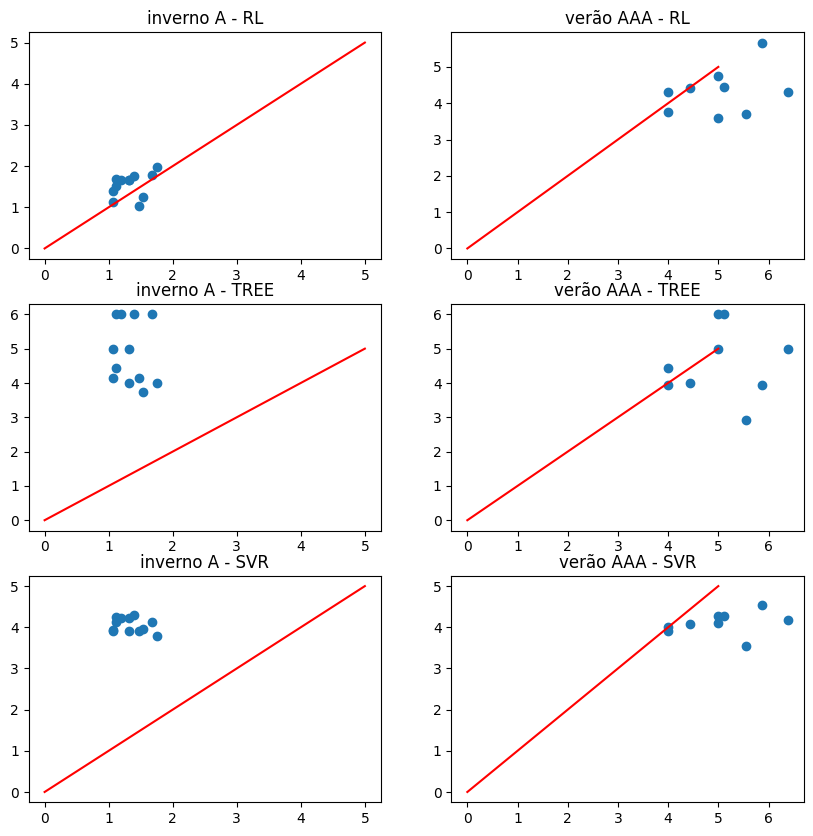

In [53]:
# Plota gráficos de regressão linear dos testes
# verifica a dispersão dos dados dos modelos treinados associando dados de teste e dados de predição, comparando a dispersão
import numpy as np
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))

x = np.arange(0,6)
y = x
ax[0,0].scatter(yi_test,yi_pred)
ax[0,0].plot(x,y,'r')
ax[0,0].set_title('inverno A - RL')

ax[0,1].scatter(yv_test,yv_pred)
ax[0,1].plot(x,y,'r')
ax[0,1].set_title('verão AAA - RL')

ax[1,0].scatter(yi_test,yi_predArvore)
ax[1,0].plot(x,y,'r')
ax[1,0].set_title('inverno A - TREE')

ax[1,1].scatter(yv_test,yv_predArvore)
ax[1,1].plot(x,y,'r')
ax[1,1].set_title('verão AAA - TREE')

ax[2,0].scatter(yi_test,yi_predSVR)
ax[2,0].plot(x,y,'r')
ax[2,0].set_title('inverno A - SVR')

ax[2,1].scatter(yv_test,yv_predSVR)
ax[2,1].plot(x,y,'r')
ax[2,1].set_title('verão AAA - SVR')

plt.show()

## CONCLUSÃO

### Após exaustivos testes e mudanças, complementando a base, modificando modelos, chega-se à conclusão que as variáveis independentes temp_max e precipitação_mm não tiveram influência nos picos e disparada da variável dependente preço_kg no período estudado nesse projeto, a correlação ficou fraca e até discrepante em alguns casos, a média, o std e a moda estão distantes mesmo aplicando a normalização, os scores e r2_scores ficaram baixos no treino e discrepantes no test, como mostrado abaixo.

### Analisano o gráfico abaixo da variação das variáveis ao longo dos anos podemos tirar mais conclusões sobre os resultados:

##### _ O gráfico abaixo mostra a variação da cotação do preço da cenoura inverno A e verão AAA, linhas verde e laranja. Nota-se que a temperatura manteve-se elevada durante os anos 2022 a 2024 com picos acima de 36°C. Os preços da cenoura de inverno A tem uma alta expressiva em janeiro-2023 com chuvas intensas no período chuvoso que se apresenta desde dezembro-2022, ou seja há mais de 2 meses já estava chovendo intensamente, a temperatura já se apresentava alta e se mantém. A cenoura de verão começa a ter um preço crescente a partir de fevereiro-2023 coincidindo com chuvas intensas, porém em menor escala, nesse período oscilando para mais e para menos nesse patamar mais alto até agosto-2023, a temperatura se mantém alta para esse período em função do fenômeno do el niño. Observa-se uma interrupção na alta de preços da cenoura de inverno A no início de janeiro-2023 ficando constante provavelmente pelo fim da colheita da safra de inverno, como também se verifica uma interrupção dos dados em janeiro-2024 encerrando a colheita da safra de inverno também. Os preços da cenoura de inverno cai em dezembro-2023, mais precisamente entre novembro-dezembro-2023. O preço da cenoura de verão, linha vermelha, apresenta o melhor desempenho com altos preços, tendo uma alta significativa a partir de janeiro-2024, mantendo preço elevado até março-2024.

regressão linear simples
  - temp_max 0.28784191142601223 (score train)
  - temp_max -1.3643820160098366 (score test)
    
  - precipitação_mm -0.6458937214402602 (score train)
  - precipitação_mm -0.9915819925335319 (score test)


regressão linear múltipla
inverno A
  - 0.30077837146389086 (r2_score train)
  - -1.489770035342179  (r2_score test)
  
verão AAA
  - 0.3515193282808391 (r2_score train)
  - -0.950273701908956 (r2_score test)

  - erro médio absoluto - inverno A
  - 0.33164356358332153
  - erro quadrático médio - inverno A
  - 0.12923981291788691

  - erro médio absoluto - verão AAA
  - 0.778317037272287
  - erro quadrático médio - verão AAA
  - 1.1494383495082965        

árvore de decisão
  - coeficiente de determinação da previsão - inverno A
  - -257.18253331192807
  - -257.18253331192807

  - erro médio absoluto e quadrático - inverno A
  - 3.5391666666666666
  - 13.401824999999995
  
  - coeficiente de determinação da previsão - verão AAA
  - -1.7807525052786808
  - -1.7807525052786808
  
  - erro médio absoluto e quadrático - verão AAA
  - 0.9744444444444444
  - 1.6388999999999996

SVR
  - coeficiente de determinação da previsão - inverno A
  - -143.2229599058329
  - -143.2229599058329
  - erro médio absoluto e quadrático - inverno A
  - 2.717736533393817
  - 7.486373477111941
  
  - coeficiente de determinação da previsão - verão AAA
  - -1.4365792983634118
  - -1.4365792983634118
  - erro médio absoluto e quadrático - verão AAA
  - 0.9438714758137158
  - 1.4360536597584022

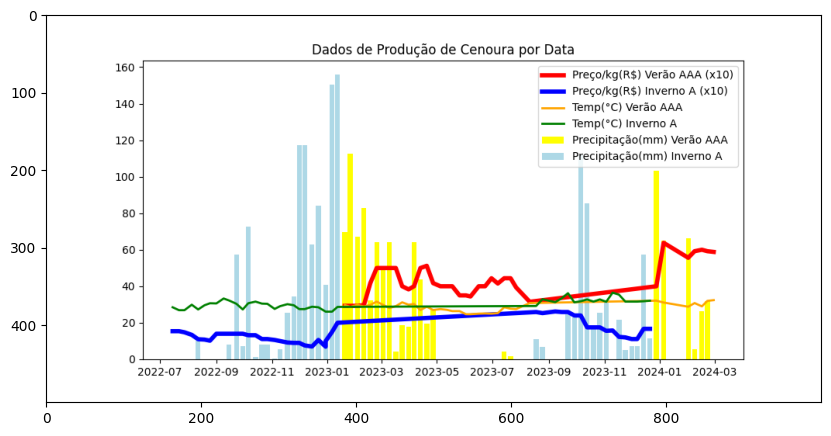

In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (10, 10))
plt.imshow(mpimg.imread('graf_prod_cenoura.png'))